### A propos du dataset diabetes

Dans ce notebook, nous allons utiliser le KNN pour construire un modèle d'apprentissage machine pour prédire si les patients du "Pima Indians Diabetes Dataset" sont diabétiques ou non.

In [27]:
### Importation des bibliothèques 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Collecte des données 

In [29]:
my_data=pd.read_csv('diabetes.csv')
my_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploration des données : 

In [30]:
my_data.shape

(768, 9)

In [31]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
my_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Creation de notre model KNN 

In [33]:
X = my_data.drop('Outcome',axis=1).values
y = my_data['Outcome'].values

Répartissons nos données de manière aléatoire entre les données de training et les données de testing.

Nous allons ajuster/entraîner un classificateur sur l'ensemble de training et faire des prédictions sur l'ensemble de test. Ensuite, nous comparerons les prédictions avec les étiquettes connues.

Scikit-learn offre la possibilité de diviser les données en deux ensembles : un ensemble d'entraînement et un ensemble de test, en utilisant la méthode train_test_split.



In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

#Mise en place de tableaux pour stocker les formations et tester les précisions
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

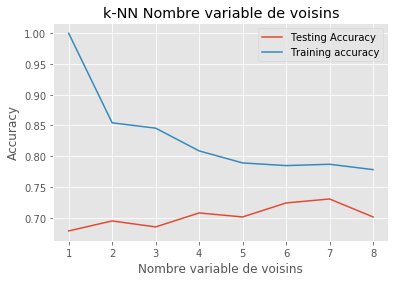

In [37]:
#Générer un complot
plt.title('k-NN Nombre variable de voisins')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Nombre variable de voisins')
plt.ylabel('Accuracy')
plt.show()

Nous pouvons observer ci-dessus que nous obtenons une précision de test maximale pour k=7. Créons donc un KNeighborsClassifier avec un nombre de voisins égal à 7.


In [38]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
knn.score(X_test,y_test)


0.7305194805194806

Confusion Matrix : 
Une matrice de confusion est un tableau à 2 dimensions qui est souvent utilisé pour décrire la performance d'un modèle de classification (ou "classificateur") sur un ensemble de données d'essai dont les valeurs réelles sont connues. Scikit-learn permet de calculer une matrice de confusion en utilisant la méthode confusion_matrix.

In [39]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)


array([[165,  36],
       [ 47,  60]], dtype=int64)

True negative = 165

False positive = 36

True postive = 60

Fasle negative = 47

In [40]:
#calcul du confusion matrix avec pandas 
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


Classification Report : 

Un autre rapport important est le rapport sur la classification. Il s'agit d'un résumé textuel de la précision, du rappel, de la note F1 pour chaque classe. Scikit-learn permet de calculer le rapport de classification en utilisant la méthode classification_report.

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



Courbe ROC (Reciever Operating Charecteristic)

Il s'agit d'un tracé du taux de vrai positif par rapport au taux de faux positif pour les différents points de coupure possibles d'un test de diagnostic.

Une courbe ROC démontre plusieurs choses :

1) Elle montre le compromis entre sensibilité et spécificité (toute augmentation de la sensibilité s'accompagne d'une diminution de la spécificité).

2) Plus la courbe suit de près le bord gauche, puis le bord supérieur de l'espace ROC, plus le test est précis.

3) Plus la courbe se rapproche de la diagonale à 45 degrés de l'espace ROC, moins le test est précis.

4) L'aire sous la courbe est une mesure de la précision du test.

In [45]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_pred_proba

array([0.        , 0.        , 0.71428571, 0.14285714, 0.        ,
       0.        , 0.28571429, 0.        , 0.57142857, 0.28571429,
       0.        , 0.14285714, 0.14285714, 0.14285714, 0.        ,
       1.        , 0.14285714, 0.85714286, 0.28571429, 0.        ,
       0.71428571, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.57142857, 0.57142857, 0.57142857, 0.85714286,
       0.        , 0.28571429, 0.        , 0.71428571, 0.71428571,
       0.42857143, 0.71428571, 0.57142857, 0.14285714, 0.        ,
       0.57142857, 0.71428571, 0.71428571, 0.14285714, 1.        ,
       0.57142857, 0.42857143, 0.28571429, 0.42857143, 0.        ,
       0.71428571, 0.        , 0.42857143, 0.28571429, 0.71428571,
       0.14285714, 0.14285714, 0.28571429, 1.        , 0.        ,
       0.57142857, 0.85714286, 0.14285714, 0.42857143, 0.14285714,
       0.71428571, 0.        , 0.        , 0.14285714, 1.        ,
       0.28571429, 0.42857143, 0.        , 0.        , 0.71428

In [46]:
from sklearn.metrics import roc_curve


In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


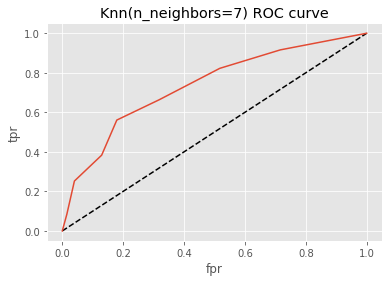

In [48]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [49]:
#Aire sous la courbe ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7345050448691124

Validation croisée : 

Maintenant, avant d'entrer dans les détails du réglage de l'hyperparamètre, comprenons le concept de validation croisée.

La performance du modèle formé dépend de la façon dont les données sont réparties. Elle peut ne pas être représentative de la capacité du modèle à généraliser.

La solution est la validation croisée.

La validation croisée est une technique permettant d'évaluer des modèles prédictifs en divisant l'échantillon original en un ensemble de formation pour entraîner le modèle, et un ensemble de test pour l'évaluer.

Dans la validation croisée k fois, l'échantillon original est divisé au hasard en k sous-échantillons de taille égale. Parmi les k sous-échantillons, un seul sous-échantillon est retenu comme données de validation pour tester le modèle, et les k-1 sous-échantillons restants sont utilisés comme données d'entraînement. Le processus de validation croisée est ensuite répété k fois , chacun des k sous-échantillons étant utilisé exactement une fois comme données de validation. Les k résultats des plis peuvent ensuite être moyennés (ou autrement combinés) pour produire une seule estimation. L'avantage de cette méthode est que toutes les observations sont utilisées à la fois pour la formation et la validation, et que chaque observation est utilisée pour la validation exactement une fois.

### Réglage des hyperparamètres

La valeur de k (c'est-à-dire 7) que nous avons choisie ci-dessus a été sélectionnée en observant la courbe de précision en fonction du nombre de voisins. C'est une façon primitive de régler les hyperparamètres.

Il existe une meilleure façon de le faire qui implique :

1) Essayer un ensemble de valeurs d'hyperparamètres différentes

2) Les installer tous séparément

3) Vérifier les performances de chacun

4) Choisir le plus performant

5) Utiliser la validation croisée à chaque fois

Scikit-learn fournit un moyen simple d'y parvenir en utilisant GridSearchCV, c'est-à-dire la validation croisée de la recherche de grille.


In [50]:
from sklearn.model_selection import GridSearchCV #pour la cross validation 
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
knn_cv.best_score_


0.7578125

In [52]:
knn_cv.best_params_


{'n_neighbors': 14}

Ainsi, un classificateur knn avec un nombre de voisins égal à 14 obtient le meilleur score/précision de 0,7578, soit environ 76%.